In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer

csv = r'C:\Users\User\Desktop\Data_mining\normalized_df.csv'
with open(csv, 'r') as file:
    df = pd.read_csv(csv)

genres = r'C:\Users\User\Desktop\Data_mining\normalized_df_with_genres.csv'
with open(genres, 'r') as file:
    df_genres = pd.read_csv(genres)

df.shape


(4423, 13)

In [2]:
df_genres.shape

(4423, 14)

In [3]:
def df_to_matrix(df):
    dict=df.T.to_dict().values()
    v=DictVectorizer()
    X=v.fit_transform(dict)
    return X

def truncSVD_var(X,d):
    svd=TruncatedSVD(d)
    Y=svd.fit_transform(X)
    return svd.explained_variance_ratio_.sum()

def explainedSVD(X,df):
    y=[]
    for k in range(1,df.shape[1]):
      sumvar=truncSVD_var(X,k)
      y.append(sumvar)
    plt.plot(range(1,df.shape[1]),y)
    plt.show()

def truncSVD(X,k):
    svd=TruncatedSVD(k)
    Y=svd.fit_transform(X)
    return Y

Dimensionality reduction: SVD

Showing how much variance is retained by each singular value

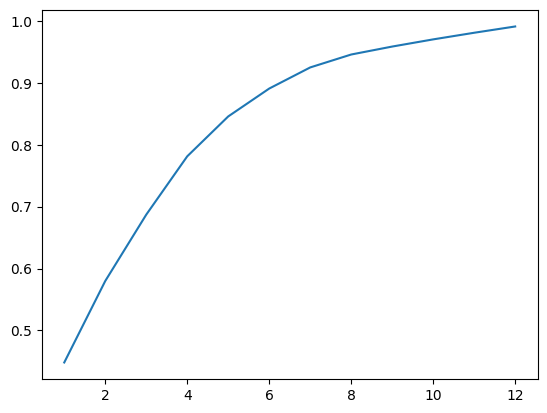

In [4]:
X=df_to_matrix(df)
explainedSVD(X,df)
#looks like 4 SV are enough
SVD=truncSVD(X,4)

Dimensionality reduction through random projection

In [5]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import johnson_lindenstrauss_min_dim

mindim=johnson_lindenstrauss_min_dim(X.shape[1], eps=0.5)

print("Number of dimensions before reduction: ",X.shape[1])
print("Minimum number of dimensions needed to preserve geometry: ",mindim)

#n_components=5
#random_projection = GaussianRandomProjection(n_components=n_components)
#RP= random_projection.fit_transform(X.toarray())

Number of dimensions before reduction:  13
Minimum number of dimensions needed to preserve geometry:  123


It looks like it's impossible to preserve geometry of our space applying random projections

Clustering with k-means

In [6]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

class kmeans:
    def __init__(self,dataset,k):
        km=KMeans(n_clusters=k, init='k-means++', n_init="auto", max_iter=300)
        km.fit(dataset)
        self.clustsize=Counter(km.labels_)
        self.labels=km.labels_
        self.cost=km.inertia_
        self.centers=km.cluster_centers_


def kmeans_elbow_plot(X,n):
    y1=[]
    y2=[]
    y3=[]
    for k in range(1,n):

        if k==1:
            clust=kmeans(X,k)
            cost=clust.cost
            ss=0
            dbi=0
            y1.append(cost)
            y2.append(ss)
            y3.append(dbi)
            continue

        clust=kmeans(X,k)
        labels=clust.labels
        cost=clust.cost
        ss=silhouette_score(X, labels)
        dbi=davies_bouldin_score(X, labels)
        y1.append(cost)
        y2.append(ss*12000)
        y3.append(dbi*8000)
        
    x=range(1,n)
    plt.plot(x, y1, label='Cost curve')
    plt.plot(x, y2, label='Silhouette score')
    plt.plot(x, y3, label='Davies-bouldin score')
    plt.legend()
    plt.show()

Plotting k-means cost, silhouette score and Davies-Bouldin index to find an appropriate value for k

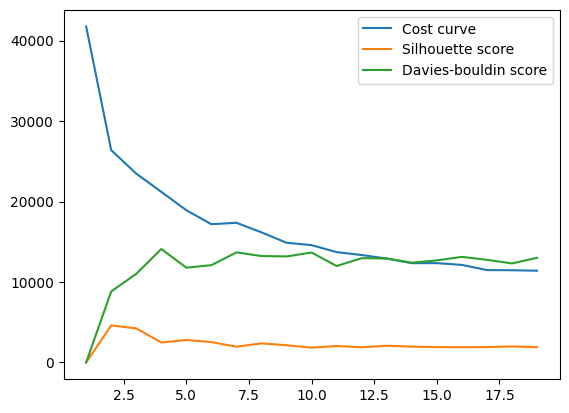

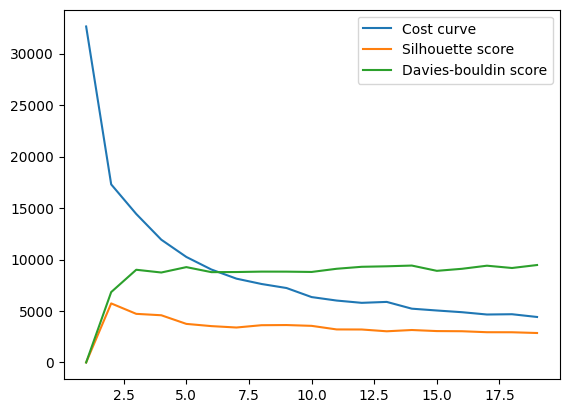

In [7]:
kmeans_elbow_plot(X.toarray(),20)
kmeans_elbow_plot(SVD, 20)

In [8]:
def print_results(df_genres,labels,k):
  for j in range(k):
    genres=[]
    for i in range(len(labels)):
      if labels[i]==j:
        track = df_genres[df_genres.index == i]
        l=track['genre'].tolist()
        if len(l)==0:
          continue
        genres.append(l[0])
    count=dict()
    for el in genres:
      if el in count:
        count[el]+=1
      else:
        count[el]=1
    print(sorted(count.items(), key=lambda x:x[1], reverse=True))
  print('Silhouette score: ',silhouette_score(X, labels))
  print('Davies-Bouldin score: ',davies_bouldin_score(X.toarray(), labels))

In [9]:
def plot_clust(Z,Y,labels):
    x=[]
    y=[]
    z=[]
    c=labels
    for i in Z:
        x.append(i[0])
        y.append(i[1])
        z.append(i[2])
    fig=plt.figure()
    ax=plt.axes(projection='3d')
    scatter=ax.scatter3D(x,y,z,c=c,s=50)
    plt.colorbar(scatter)
    plt.show()
    

In [10]:
features=df.columns.tolist()

We can now cluster non-reduced data using k-means trying different values for k

Centers coordinates:

   popularity  danceability    energy       key  loudness  speechiness  \
0   -0.505446      0.414970 -0.015219  0.476037 -0.493601     0.009292   
1    1.280167     -1.051015  0.038546 -1.205680  1.250166    -0.023534   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.035523          0.526586  0.045316  0.137005  0.158771     0.057556   
1     -0.089971         -1.333710 -0.114775 -0.347000 -0.402127    -0.145774   

   time_signature  
0        0.381440  
1       -0.966091  
Counter({0: 3171, 1: 1252}) 

[('OTHERS', 669), ('HIPHOP', 337), ('DANCE', 302), ('PUNK', 181), ('REGGAE', 167), ('ROCK', 164), ('HEAVYMETAL', 145), ('LOVESONGS', 112), ('JAZZ', 110), ('KIDS', 100), ('METAL', 100), ('COUNTRY', 98), ('STONERROCK', 98), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 68), ('GRUNGE', 57), ('ANIMESONGS', 56), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NATURESOUNDS', 26), ('NETFLIXSOUNDTRACK', 19), ('CLASSICAL

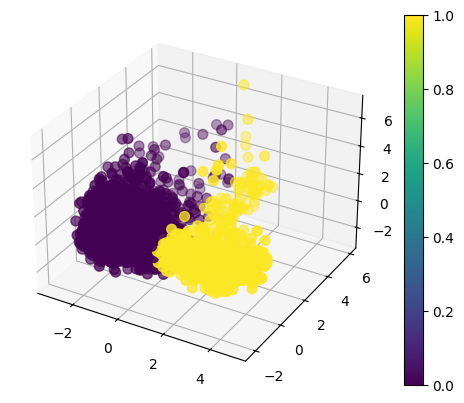

Centers coordinates:

   popularity  danceability    energy       key  loudness  speechiness  \
0   -0.458864      0.804252 -0.063734  0.386130 -0.562743     0.029450   
1    1.287096     -1.057123  0.039103 -1.223124  1.256577    -0.025439   
2   -0.502317      0.337322 -0.006494  0.486141 -0.470202     0.006340   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.211693          0.448144  0.081983  2.409408 -0.016350     0.071960   
1     -0.118662         -1.338574 -0.116034 -0.418234 -0.400858    -0.149505   
2      0.016488          0.527526  0.038134 -0.234722  0.184483     0.055063   

   time_signature  
0        0.400991  
1       -0.966505  
2        0.367266  
Counter({2: 2715, 1: 1230, 0: 478}) 

[('HIPHOP', 182), ('OTHERS', 103), ('REGGAE', 55), ('NATURESOUNDS', 26), ('ANIMESONGS', 25), ('RB', 15), ('DANCE', 14), ('LATINA', 12), ('AFRO', 8), ('PUNK', 8), ('HEAVYMETAL', 6), ('METAL', 5), ('ROCK', 5), ('ALTERNATIVE', 3), ('LOVESONGS', 

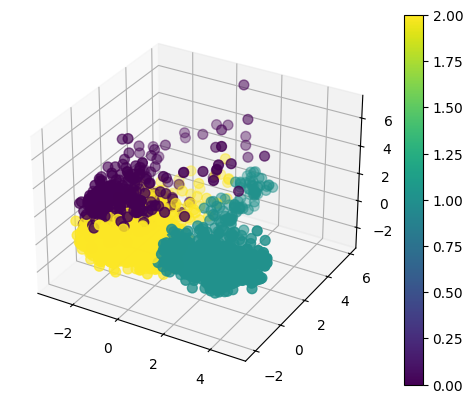

Centers coordinates:

   popularity  danceability    energy       key  loudness  speechiness  \
0    1.380042     -1.161177  0.033842 -1.455889  1.520188    -0.022082   
1   -0.461374      0.855599 -0.065188  0.340985 -0.592206     0.030252   
2   -0.864149     -0.191395  0.048230  0.822267 -0.301816     0.013786   
3    0.773054      0.007012  0.039782 -0.655597 -0.450959    -0.031733   
4   -0.145254     -0.564992 -0.062170  0.856275  0.441996    -0.018211   
5   -0.564196      0.870749 -0.054646  0.519851 -0.580310     0.014643   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -0.408165         -1.601994 -0.131114 -0.434724 -0.396372    -0.169342   
1      0.029777          0.444244  0.086449  2.526559 -0.007716     0.073282   
2      0.063063          0.620976  0.004313 -0.165863  0.557108     0.051083   
3     -0.261045          0.077481  0.021795 -0.393543 -0.263866    -0.022176   
4      3.399317         -0.151858 -0.051944  0.139863 -0.26

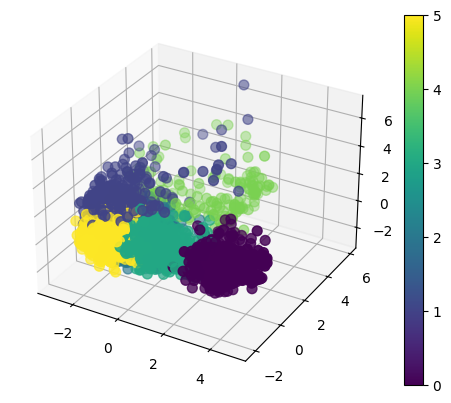

In [11]:
k=[2,3,6]

for i in k:
    clust=kmeans(X,i)
    print('Centers coordinates:\n')
    print(pd.DataFrame(clust.centers, columns=features))
    labels=clust.labels
    print(clust.clustsize,'\n')
    print_results(df_genres,labels,i)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,clust,labels)


Clustering reduced data

Counter({0: 3159, 1: 1264}) 

[('OTHERS', 665), ('HIPHOP', 337), ('DANCE', 302), ('PUNK', 181), ('REGGAE', 167), ('ROCK', 163), ('HEAVYMETAL', 145), ('LOVESONGS', 110), ('JAZZ', 109), ('KIDS', 100), ('METAL', 100), ('COUNTRY', 98), ('STONERROCK', 97), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 67), ('GRUNGE', 57), ('ANIMESONGS', 56), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NATURESOUNDS', 24), ('NETFLIXSOUNDTRACK', 19), ('CLASSICAL', 3)]
[('FOCUSING', 300), ('SLEEP', 277), ('CLASSICAL', 229), ('JAZZ', 141), ('AMBIENT', 120), ('NATURESOUNDS', 107), ('OTHERS', 52), ('LOVESONGS', 25), ('BLUES', 3), ('ROCK', 3), ('STONERROCK', 3), ('NETFLIXSOUNDTRACK', 2), ('ANIMESONGS', 1), ('REGGAE', 1)]
Silhouette score:  0.3824680904473028
Davies-Bouldin score:  1.1077716325506832




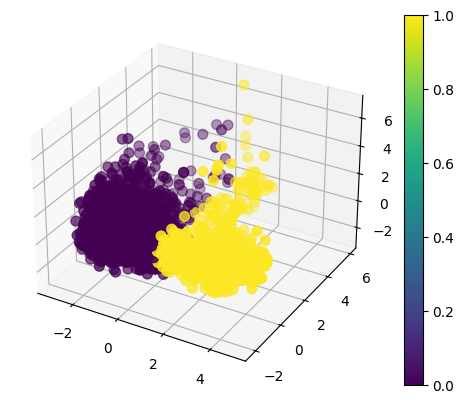

Counter({3: 1849, 2: 997, 1: 824, 4: 449, 0: 304}) 

[('NATURESOUNDS', 102), ('DANCE', 32), ('OTHERS', 28), ('HEAVYMETAL', 26), ('METAL', 22), ('PUNK', 22), ('STONERROCK', 15), ('HIPHOP', 12), ('GRUNGE', 8), ('ALTERNATIVE', 6), ('JAZZ', 5), ('ROCK', 5), ('ANIMESONGS', 4), ('LOVESONGS', 3), ('AMBIENT', 2), ('KIDS', 2), ('BLUES', 2), ('CLASSICAL', 2), ('REGGAE', 2), ('RB', 2), ('KPOP', 1), ('COUNTRY', 1)]
[('OTHERS', 200), ('JAZZ', 163), ('LOVESONGS', 86), ('HIPHOP', 37), ('STONERROCK', 36), ('REGGAE', 34), ('BLUES', 33), ('ROCK', 31), ('COUNTRY', 26), ('KIDS', 23), ('FUNK', 23), ('CLASSICAL', 17), ('DANCE', 16), ('RB', 14), ('AFRO', 13), ('ALTERNATIVE', 11), ('NETFLIXSOUNDTRACK', 9), ('GRUNGE', 9), ('ANIMESONGS', 8), ('METAL', 8), ('PUNK', 8), ('LATINA', 5), ('HEAVYMETAL', 5), ('KPOP', 4), ('AMBIENT', 3), ('NATURESOUNDS', 2)]
[('FOCUSING', 300), ('SLEEP', 277), ('CLASSICAL', 213), ('AMBIENT', 115), ('JAZZ', 72), ('NATURESOUNDS', 10), ('OTHERS', 7), ('LOVESONGS', 3)]
[('OTHERS', 382), ('

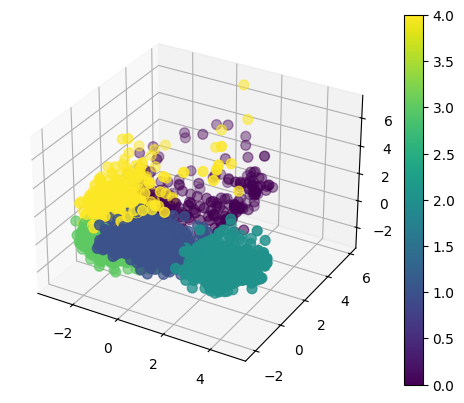

In [97]:
k=[2,5]
for i in k:
    clust=kmeans(SVD,i)
    labels=clust.labels
    print(clust.clustsize,'\n')
    print_results(df_genres,labels,i)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,clust, labels)

Let's try to cluster using a hierarchical agglomerative algorithm

In [68]:
from sklearn.cluster import AgglomerativeClustering


def hac_metrics_plot(X,n):
    y1=[]
    y2=[]
    for k in range(2,n):

        agglomerative_model = AgglomerativeClustering(n_clusters=k)
        agglomerative_result = agglomerative_model.fit_predict(X)
        ss=silhouette_score(X, agglomerative_result)
        dbi=davies_bouldin_score(X, agglomerative_result)
        y1.append(dbi)
        y2.append(ss)
        
    x=range(2,n)
    plt.plot(x, y1, label='Davies-bouldin score')
    plt.plot(x, y2, label='Silhouette score')
    
    plt.legend()
    plt.show()

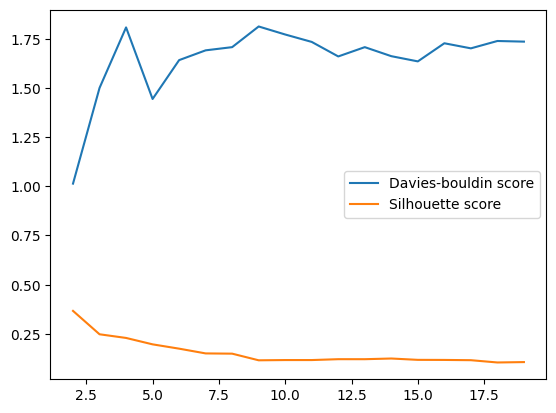

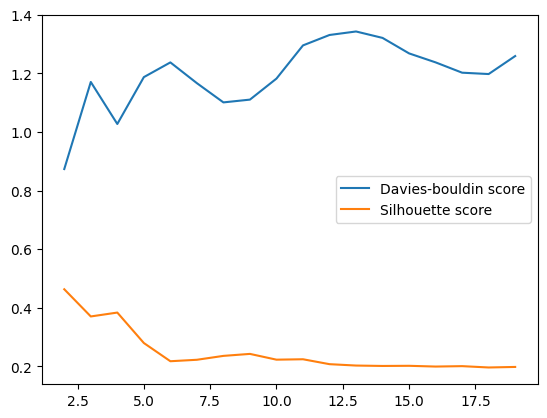

In [98]:
hac_metrics_plot(X.toarray(),20)
hac_metrics_plot(SVD,20)

Agglomerative clustering on non-reduced data

[('OTHERS', 697), ('HIPHOP', 337), ('DANCE', 302), ('PUNK', 181), ('JAZZ', 172), ('ROCK', 166), ('REGGAE', 165), ('HEAVYMETAL', 145), ('LOVESONGS', 134), ('NATURESOUNDS', 131), ('KIDS', 100), ('METAL', 100), ('COUNTRY', 98), ('STONERROCK', 98), ('ALTERNATIVE', 83), ('FUNK', 74), ('BLUES', 68), ('GRUNGE', 57), ('ANIMESONGS', 55), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NETFLIXSOUNDTRACK', 21), ('CLASSICAL', 20), ('AMBIENT', 8)]
[('FOCUSING', 300), ('SLEEP', 277), ('CLASSICAL', 212), ('AMBIENT', 112), ('JAZZ', 78), ('OTHERS', 20), ('REGGAE', 3), ('ALTERNATIVE', 2), ('ANIMESONGS', 2), ('BLUES', 2), ('STONERROCK', 2), ('LOVESONGS', 1), ('FUNK', 1)]
Silhouette score:  0.36682796408297813
Davies-Bouldin score:  1.0136329611234651




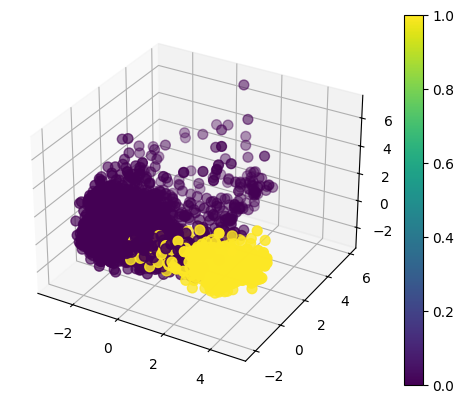

[('OTHERS', 482), ('DANCE', 287), ('PUNK', 172), ('ROCK', 154), ('HIPHOP', 152), ('HEAVYMETAL', 142), ('REGGAE', 108), ('METAL', 96), ('KIDS', 93), ('COUNTRY', 90), ('STONERROCK', 82), ('ALTERNATIVE', 78), ('FUNK', 67), ('LOVESONGS', 61), ('GRUNGE', 57), ('KPOP', 47), ('BLUES', 44), ('LATINA', 37), ('RB', 36), ('JAZZ', 35), ('AFRO', 32), ('ANIMESONGS', 28), ('NETFLIXSOUNDTRACK', 13), ('NATURESOUNDS', 13), ('CLASSICAL', 1)]
[('FOCUSING', 300), ('SLEEP', 277), ('CLASSICAL', 212), ('AMBIENT', 112), ('JAZZ', 78), ('OTHERS', 20), ('REGGAE', 3), ('ALTERNATIVE', 2), ('ANIMESONGS', 2), ('BLUES', 2), ('STONERROCK', 2), ('LOVESONGS', 1), ('FUNK', 1)]
[('HIPHOP', 179), ('OTHERS', 105), ('REGGAE', 52), ('ANIMESONGS', 26), ('NATURESOUNDS', 19), ('RB', 19), ('DANCE', 14), ('LATINA', 12), ('AFRO', 10), ('PUNK', 7), ('LOVESONGS', 4), ('ROCK', 4), ('BLUES', 3), ('METAL', 3), ('ALTERNATIVE', 2), ('KIDS', 2), ('JAZZ', 2), ('KPOP', 1), ('FUNK', 1), ('HEAVYMETAL', 1)]
[('NATURESOUNDS', 99), ('STONERROCK', 

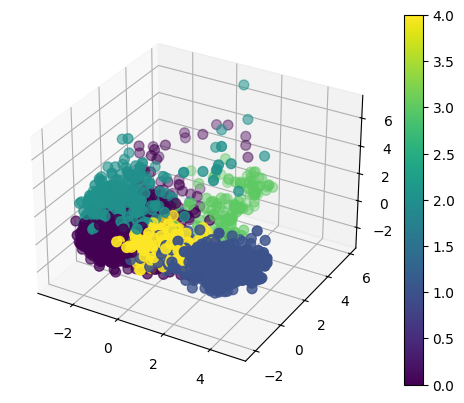

In [99]:
k=[2,5]

for i in k:
    agglomerative_model = AgglomerativeClustering(n_clusters=i)
    agglomerative_result = agglomerative_model.fit_predict(X.toarray())
    print_results(df_genres,agglomerative_result,i)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,agglomerative_model, agglomerative_result)

Agglomerative clustering on reduced data

[('OTHERS', 656), ('HIPHOP', 337), ('DANCE', 302), ('PUNK', 179), ('REGGAE', 167), ('ROCK', 164), ('HEAVYMETAL', 143), ('JAZZ', 106), ('LOVESONGS', 100), ('KIDS', 100), ('METAL', 100), ('COUNTRY', 97), ('STONERROCK', 89), ('ALTERNATIVE', 83), ('FUNK', 74), ('BLUES', 68), ('GRUNGE', 57), ('RB', 55), ('ANIMESONGS', 53), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NATURESOUNDS', 28), ('NETFLIXSOUNDTRACK', 18), ('CLASSICAL', 4), ('AMBIENT', 1)]
[('FOCUSING', 300), ('SLEEP', 277), ('CLASSICAL', 228), ('JAZZ', 144), ('AMBIENT', 119), ('NATURESOUNDS', 103), ('OTHERS', 61), ('LOVESONGS', 35), ('STONERROCK', 11), ('ANIMESONGS', 4), ('NETFLIXSOUNDTRACK', 3), ('ALTERNATIVE', 2), ('BLUES', 2), ('PUNK', 2), ('ROCK', 2), ('HEAVYMETAL', 2), ('COUNTRY', 1), ('FUNK', 1), ('REGGAE', 1)]
Silhouette score:  0.37085504709404254
Davies-Bouldin score:  1.1334537394426836




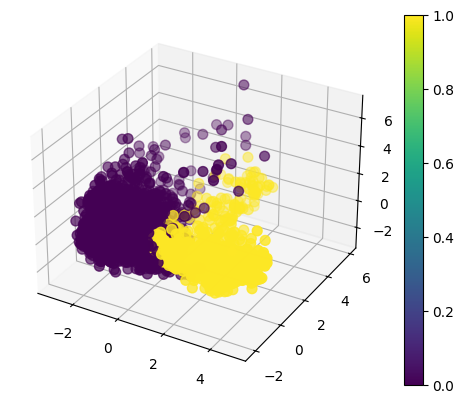

[('OTHERS', 545), ('DANCE', 284), ('PUNK', 168), ('ROCK', 159), ('HIPHOP', 149), ('HEAVYMETAL', 132), ('REGGAE', 112), ('JAZZ', 105), ('LOVESONGS', 97), ('COUNTRY', 96), ('KIDS', 93), ('METAL', 90), ('STONERROCK', 89), ('ALTERNATIVE', 77), ('FUNK', 74), ('BLUES', 67), ('GRUNGE', 57), ('KPOP', 48), ('RB', 38), ('LATINA', 37), ('AFRO', 34), ('ANIMESONGS', 27), ('NETFLIXSOUNDTRACK', 18), ('CLASSICAL', 4), ('NATURESOUNDS', 4), ('AMBIENT', 1)]
[('FOCUSING', 300), ('SLEEP', 277), ('CLASSICAL', 225), ('JAZZ', 140), ('AMBIENT', 116), ('OTHERS', 59), ('LOVESONGS', 35), ('STONERROCK', 10), ('NATURESOUNDS', 8), ('NETFLIXSOUNDTRACK', 3), ('ANIMESONGS', 3), ('ALTERNATIVE', 2), ('BLUES', 2), ('ROCK', 2), ('HEAVYMETAL', 2), ('COUNTRY', 1), ('FUNK', 1), ('PUNK', 1), ('REGGAE', 1)]
[('HIPHOP', 188), ('OTHERS', 111), ('REGGAE', 55), ('ANIMESONGS', 26), ('NATURESOUNDS', 24), ('DANCE', 18), ('RB', 17), ('LATINA', 13), ('PUNK', 11), ('HEAVYMETAL', 11), ('AFRO', 10), ('METAL', 10), ('KIDS', 7), ('ALTERNATIV

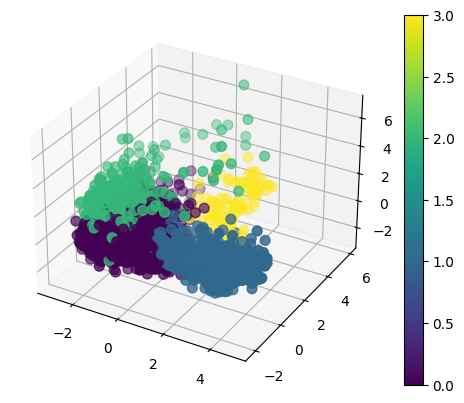

[('OTHERS', 330), ('DANCE', 119), ('HIPHOP', 109), ('REGGAE', 87), ('JAZZ', 80), ('ROCK', 73), ('KIDS', 70), ('LOVESONGS', 66), ('COUNTRY', 59), ('FUNK', 58), ('BLUES', 45), ('KPOP', 35), ('LATINA', 30), ('ALTERNATIVE', 30), ('AFRO', 29), ('PUNK', 28), ('RB', 26), ('METAL', 20), ('HEAVYMETAL', 20), ('ANIMESONGS', 15), ('GRUNGE', 15), ('STONERROCK', 13), ('NETFLIXSOUNDTRACK', 8), ('CLASSICAL', 4)]
[('HIPHOP', 183), ('OTHERS', 109), ('REGGAE', 54), ('ANIMESONGS', 25), ('DANCE', 17), ('RB', 17), ('LATINA', 13), ('PUNK', 11), ('AFRO', 10), ('HEAVYMETAL', 10), ('METAL', 9), ('KIDS', 7), ('ALTERNATIVE', 6), ('NATURESOUNDS', 6), ('ROCK', 5), ('LOVESONGS', 3), ('KPOP', 2), ('BLUES', 1), ('COUNTRY', 1), ('JAZZ', 1)]
[('OTHERS', 101), ('DANCE', 77), ('HEAVYMETAL', 60), ('PUNK', 54), ('METAL', 46), ('ROCK', 37), ('STONERROCK', 33), ('HIPHOP', 27), ('GRUNGE', 21), ('ALTERNATIVE', 19), ('COUNTRY', 13), ('FUNK', 9), ('KPOP', 8), ('LOVESONGS', 8), ('BLUES', 8), ('JAZZ', 8), ('KIDS', 7), ('REGGAE', 6)

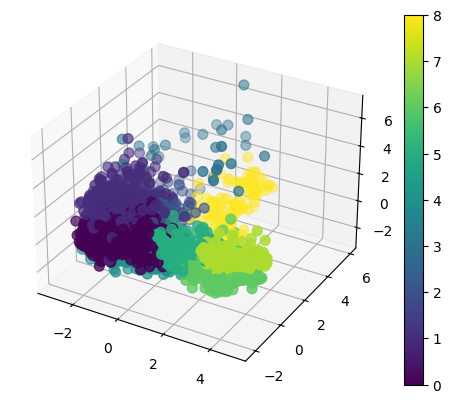

In [100]:
k=[2,4,9]

for i in k:
    agglomerative_model = AgglomerativeClustering(n_clusters=i)
    agglomerative_result = agglomerative_model.fit_predict(SVD)
    print_results(df_genres,agglomerative_result,i)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,agglomerative_model, agglomerative_result)

Silhouette score on non-reduced data to choose DBSCAN parameters

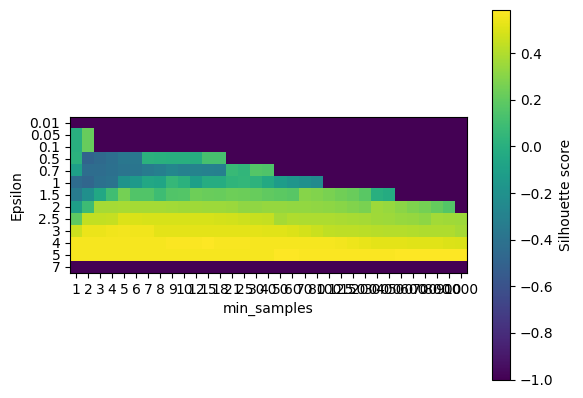

In [72]:
from sklearn.cluster import DBSCAN
import numpy as np

eps=[0.01,0.05,0.1,0.5,0.7,1,1.5,2,2.5,3,4,5,7]

ms=[1,2,3,4,5,6,7,8,9,10,12,15,18,21,25,30,40,50,60,70,80,100,125,150,200,300,400,500,600,700,800,900,1000]

table_data = np.zeros((len(eps), len(ms)))

for i in range(len(eps)):
    for j in range(len(ms)):
        clustering = DBSCAN(eps=eps[i], min_samples=ms[j]).fit(X.toarray())
        labelsdb=clustering.labels_
        try:
            table_data[i, j] = silhouette_score(X, labelsdb)
        except:
            table_data[i, j] = -1
            continue

plt.imshow(table_data, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(ms)), ms)
plt.yticks(np.arange(len(eps)), eps)
plt.xlabel('min_samples')
plt.ylabel('Epsilon')

plt.colorbar(label='Silhouette score')
plt.show()



In [73]:
matrix=table_data
largest_index = np.unravel_index(np.argmax(matrix), matrix.shape)

largest_value = matrix[largest_index]

print("The largest score in the matrix is:", largest_value)
print('Epsilon value: ',eps[largest_index[0]])
print('min_sample value: ',ms[largest_index[1]])

The largest score in the matrix is: 0.5861999563272838
Epsilon value:  5
min_sample value:  50


Davies-bouldin index on non-reduced data

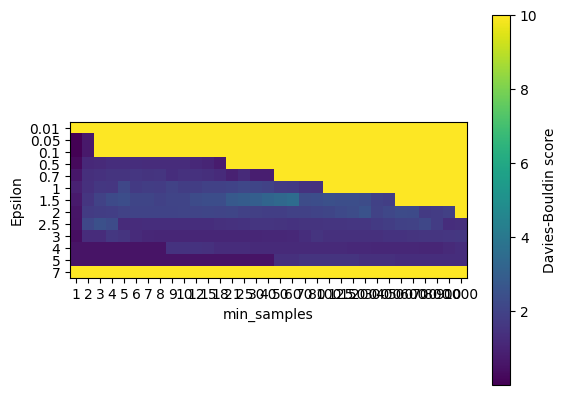

In [76]:
for i in range(len(eps)):
    for j in range(len(ms)):
        clustering = DBSCAN(eps=eps[i], min_samples=ms[j]).fit(X.toarray())
        labelsdb=clustering.labels_
        try:
            table_data[i, j] = davies_bouldin_score(X.toarray(), labelsdb)
        except:
            table_data[i, j] = 10
            continue
        

plt.imshow(table_data, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(ms)), ms)
plt.yticks(np.arange(len(eps)), eps)
plt.xlabel('min_samples')
plt.ylabel('Epsilon')

plt.colorbar(label='Davies-Bouldin score')
plt.show()

In [77]:
matrix=table_data
lowest_index = np.unravel_index(np.argmin(matrix), matrix.shape)

# Find the largest value in the matrix
lowest_value = matrix[lowest_index]

print("The lowest score in the matrix is:", lowest_value)
print('Epsilon value: ',eps[lowest_index[0]])
print('min_sample value: ',ms[lowest_index[1]])

The lowest score in the matrix is: 0.0035593103074500086
Epsilon value:  0.05
min_sample value:  1


On reduced data

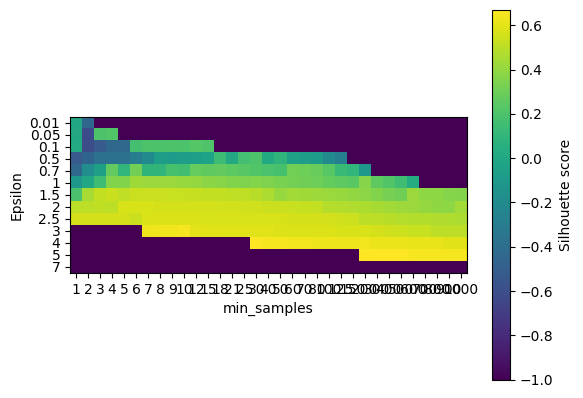

In [103]:
for i in range(len(eps)):
    for j in range(len(ms)):
        clustering = DBSCAN(eps=eps[i], min_samples=ms[j]).fit(SVD)
        labelsdb=clustering.labels_
        try:
            table_data[i, j] = silhouette_score(SVD, labelsdb)
        except:
            table_data[i, j] = -1
            continue

plt.imshow(table_data, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(ms)), ms)
plt.yticks(np.arange(len(eps)), eps)
plt.xlabel('min_samples')
plt.ylabel('Epsilon')

plt.colorbar(label='Silhouette score')
plt.show()

In [104]:
matrix=table_data
largest_index = np.unravel_index(np.argmax(matrix), matrix.shape)

largest_value = matrix[largest_index]

print("The largest score in the matrix is:", largest_value)
print('Epsilon value: ',eps[largest_index[0]])
print('min_sample value: ',ms[largest_index[1]])

The largest score in the matrix is: 0.6696050576923652
Epsilon value:  4
min_sample value:  30


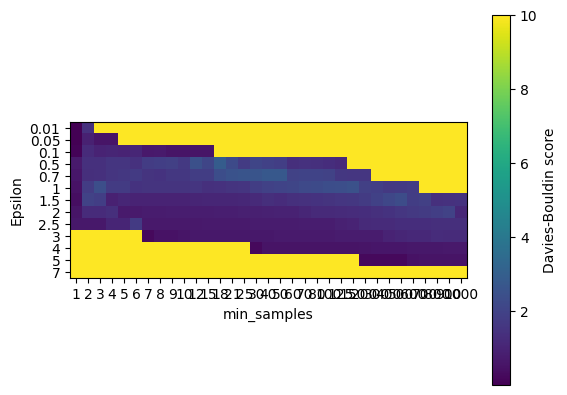

In [105]:
for i in range(len(eps)):
    for j in range(len(ms)):
        clustering = DBSCAN(eps=eps[i], min_samples=ms[j]).fit(SVD)
        labelsdb=clustering.labels_
        try:
            table_data[i, j] = davies_bouldin_score(SVD, labelsdb)
        except:
            table_data[i, j] = 10
            continue
        

plt.imshow(table_data, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(ms)), ms)
plt.yticks(np.arange(len(eps)), eps)
plt.xlabel('min_samples')
plt.ylabel('Epsilon')

plt.colorbar(label='Davies-Bouldin score')
plt.show()

In [106]:
matrix=table_data
lowest_index = np.unravel_index(np.argmin(matrix), matrix.shape)

# Find the largest value in the matrix
lowest_value = matrix[lowest_index]

print("The lowest score in the matrix is:", lowest_value)
print('Epsilon value: ',eps[lowest_index[0]])
print('min_sample value: ',ms[lowest_index[1]])

The lowest score in the matrix is: 0.0024117339458082014
Epsilon value:  0.01
min_sample value:  1


Using found parameters to cluster non-reduced data

Number of clusters:  13
[('OTHERS', 717), ('HIPHOP', 337), ('DANCE', 302), ('FOCUSING', 300), ('SLEEP', 277), ('JAZZ', 250), ('CLASSICAL', 232), ('PUNK', 181), ('REGGAE', 168), ('ROCK', 166), ('HEAVYMETAL', 145), ('LOVESONGS', 135), ('NATURESOUNDS', 131), ('AMBIENT', 119), ('KIDS', 100), ('METAL', 100), ('STONERROCK', 99), ('COUNTRY', 98), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 70), ('ANIMESONGS', 57), ('GRUNGE', 57), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NETFLIXSOUNDTRACK', 21)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
Silhouette score:  0.5927098005222566
Davies-Bouldin score:  0.4849047022620782




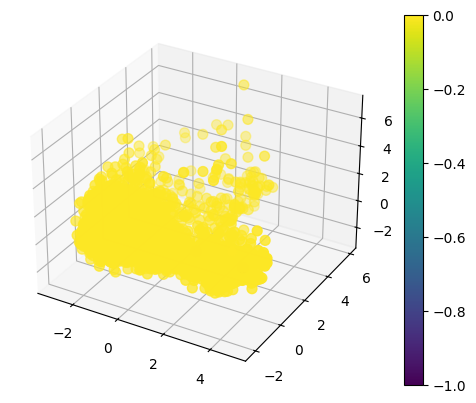

Number of clusters:  13
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
Silhouette score:  0.0008689293726121765
Davies-Bouldin score:  0.005942285336720839




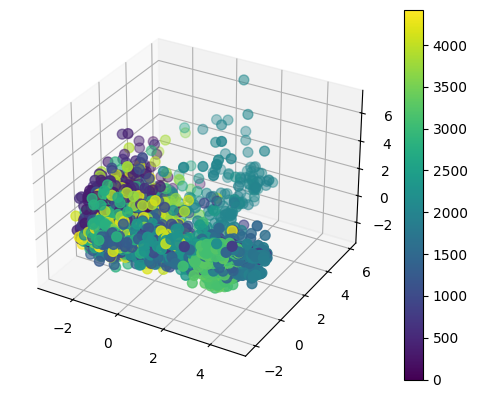

In [101]:
parameters=[[5,50],[0.05,1]]

for i in parameters:
    clustering = DBSCAN(eps=i[0], min_samples=i[1]).fit(X.toarray())
    labelsdb=clustering.labels_
    n=clustering.n_features_in_
    print('Number of clusters: ',n)
    print_results(df_genres,labelsdb,n)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,clustering,labelsdb)

Now clustering reduced data

Number of clusters:  4
[('OTHERS', 717), ('HIPHOP', 337), ('DANCE', 302), ('FOCUSING', 300), ('SLEEP', 277), ('JAZZ', 250), ('CLASSICAL', 232), ('PUNK', 181), ('REGGAE', 168), ('ROCK', 166), ('HEAVYMETAL', 145), ('LOVESONGS', 135), ('NATURESOUNDS', 130), ('AMBIENT', 120), ('KIDS', 100), ('METAL', 100), ('STONERROCK', 100), ('COUNTRY', 98), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 70), ('ANIMESONGS', 57), ('GRUNGE', 57), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NETFLIXSOUNDTRACK', 21)]
[]
[]
[]
Silhouette score:  0.619457061582098
Davies-Bouldin score:  0.2786759926519842




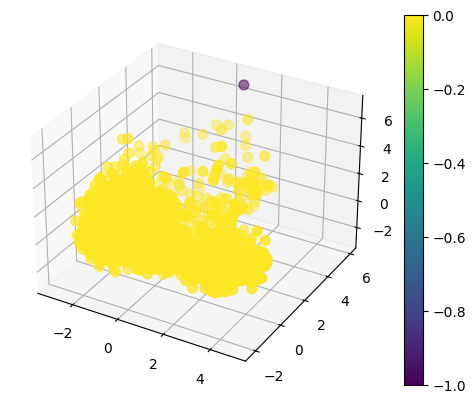

Number of clusters:  4
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
[('DANCE', 1)]
Silhouette score:  0.0027852506010451602
Davies-Bouldin score:  0.030615869522264434




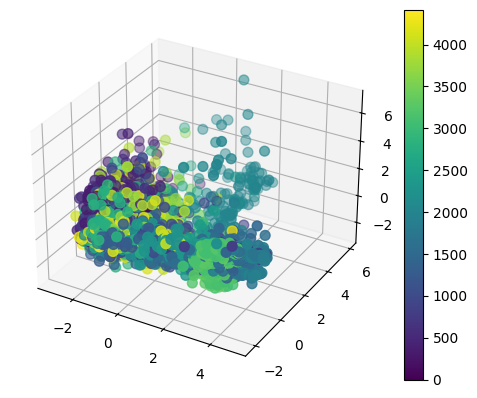

In [107]:
parameters=[[4,30],[0.01,1]]

for i in parameters:
    clustering = DBSCAN(eps=i[0], min_samples=i[1]).fit(SVD)
    labelsdb=clustering.labels_
    n=clustering.n_features_in_
    print('Number of clusters: ',n)
    print_results(df_genres,labelsdb,n)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,clustering,labelsdb)

Let's try to apply spectral clustering

In [108]:
from sklearn.cluster import SpectralClustering

def sc_metrics_plot(X,n):
    y1=[]
    y2=[]
    for k in range(2,n):
        y_spectral = SpectralClustering(n_clusters=k).fit(X)
        labelssc = y_spectral.labels_
        ss=silhouette_score(X, labelssc)
        dbi=davies_bouldin_score(X, labelssc)
        y1.append(dbi)
        y2.append(ss)
        
    x=range(2,n)
    plt.plot(x, y1, label='Davies-bouldin score')
    plt.plot(x, y2, label='Silhouette score')
    
    plt.legend()
    plt.show()

Plotting again the metrics to choose appropriate number of clusters

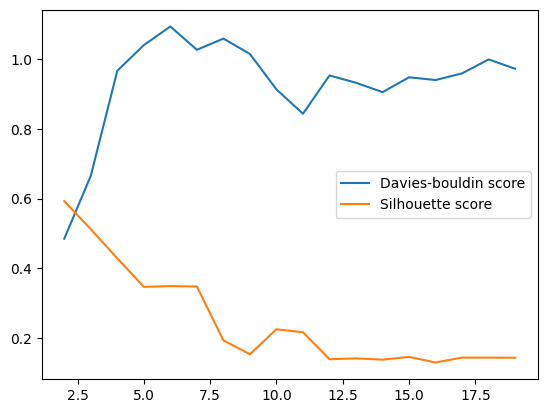

In [109]:
sc_metrics_plot(X.toarray(),20)

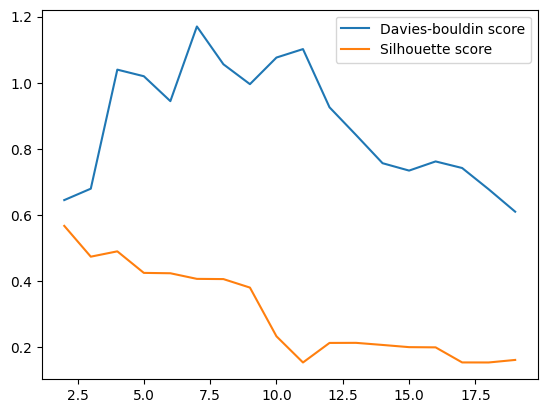

In [110]:
sc_metrics_plot(SVD,20)

Clustering non-reduced data

[('OTHERS', 717), ('HIPHOP', 337), ('DANCE', 302), ('FOCUSING', 300), ('SLEEP', 277), ('JAZZ', 250), ('CLASSICAL', 232), ('PUNK', 181), ('REGGAE', 168), ('ROCK', 166), ('HEAVYMETAL', 145), ('LOVESONGS', 135), ('NATURESOUNDS', 131), ('AMBIENT', 119), ('KIDS', 100), ('METAL', 100), ('STONERROCK', 99), ('COUNTRY', 98), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 70), ('ANIMESONGS', 57), ('GRUNGE', 57), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NETFLIXSOUNDTRACK', 21)]
[('AMBIENT', 1), ('STONERROCK', 1)]
Silhouette score:  0.5927098005222566
Davies-Bouldin score:  0.4849047022620782




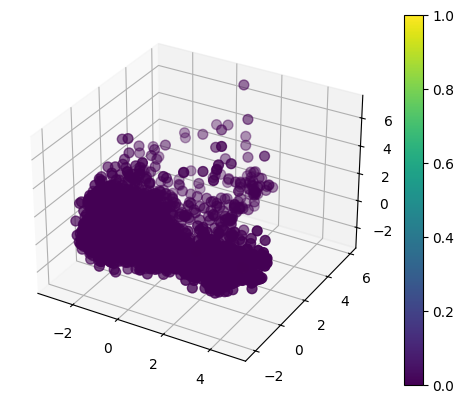

[('OTHERS', 716), ('HIPHOP', 335), ('DANCE', 302), ('FOCUSING', 300), ('SLEEP', 277), ('JAZZ', 250), ('CLASSICAL', 232), ('PUNK', 181), ('REGGAE', 168), ('ROCK', 166), ('HEAVYMETAL', 144), ('LOVESONGS', 135), ('AMBIENT', 119), ('KIDS', 100), ('METAL', 99), ('STONERROCK', 99), ('COUNTRY', 98), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 70), ('NATURESOUNDS', 69), ('ANIMESONGS', 57), ('GRUNGE', 57), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NETFLIXSOUNDTRACK', 21)]
[('AMBIENT', 1), ('STONERROCK', 1)]
[('NATURESOUNDS', 5)]
[('HIPHOP', 2)]
[('NATURESOUNDS', 6)]
[('NATURESOUNDS', 2), ('METAL', 1), ('HEAVYMETAL', 1)]
[('NATURESOUNDS', 2)]
[('NATURESOUNDS', 39), ('OTHERS', 1)]
[('NATURESOUNDS', 4)]
[('NATURESOUNDS', 2)]
[('NATURESOUNDS', 2)]
Silhouette score:  0.14181532092393848
Davies-Bouldin score:  0.9976019203186809




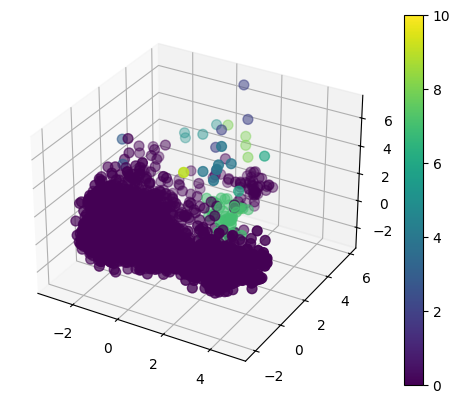

In [111]:
k=[2,11]

for i in k:
    y_spectral = SpectralClustering(n_clusters=i).fit(X.toarray())
    labelssc = y_spectral.labels_
    print_results(df_genres,labelssc,i)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,y_spectral, labelssc)

Clustering reduced data

[('OTHERS', 717), ('HIPHOP', 337), ('DANCE', 302), ('FOCUSING', 300), ('SLEEP', 277), ('JAZZ', 250), ('CLASSICAL', 232), ('PUNK', 181), ('REGGAE', 168), ('ROCK', 166), ('HEAVYMETAL', 145), ('LOVESONGS', 135), ('AMBIENT', 120), ('NATURESOUNDS', 118), ('KIDS', 100), ('METAL', 100), ('STONERROCK', 100), ('COUNTRY', 98), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 70), ('ANIMESONGS', 57), ('GRUNGE', 57), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('AFRO', 44), ('NETFLIXSOUNDTRACK', 21)]
[('NATURESOUNDS', 13)]
Silhouette score:  0.5121167329662968
Davies-Bouldin score:  0.7571699666226026




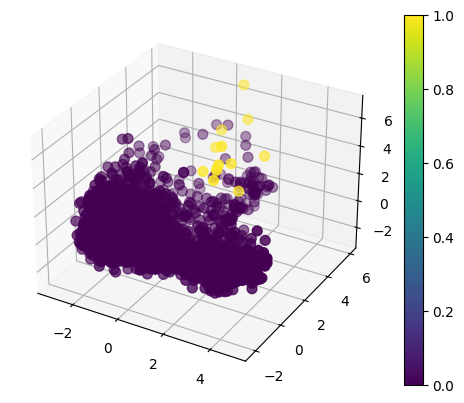

[('OTHERS', 716), ('HIPHOP', 335), ('DANCE', 302), ('FOCUSING', 300), ('SLEEP', 277), ('JAZZ', 249), ('CLASSICAL', 232), ('PUNK', 181), ('REGGAE', 168), ('ROCK', 166), ('HEAVYMETAL', 145), ('LOVESONGS', 135), ('AMBIENT', 120), ('KIDS', 100), ('METAL', 100), ('STONERROCK', 100), ('COUNTRY', 98), ('ALTERNATIVE', 85), ('FUNK', 75), ('BLUES', 70), ('ANIMESONGS', 57), ('GRUNGE', 57), ('RB', 55), ('KPOP', 50), ('LATINA', 50), ('NATURESOUNDS', 49), ('AFRO', 44), ('NETFLIXSOUNDTRACK', 21)]
[('HIPHOP', 2)]
[('NATURESOUNDS', 6)]
[('NATURESOUNDS', 5)]
[('NATURESOUNDS', 2)]
[('NATURESOUNDS', 69), ('JAZZ', 1), ('OTHERS', 1)]
Silhouette score:  0.3720571755066057
Davies-Bouldin score:  1.0820721619915319




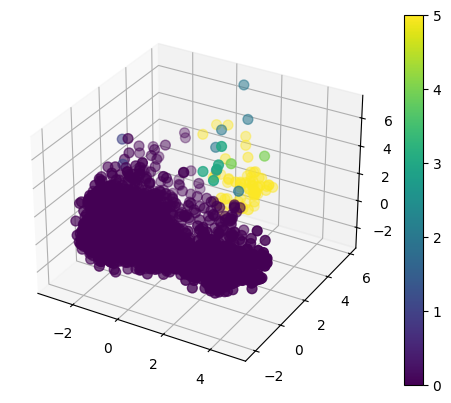

In [112]:
k=[2,6]

for i in k:
    y_spectral = SpectralClustering(n_clusters=i).fit(SVD)
    labelssc = y_spectral.labels_
    print_results(df_genres,labelssc,i)
    print('\n')
    Z=truncSVD(X,3)
    plot_clust(Z,y_spectral, labelssc)